<h1>Speed Dating: Who to Date Long Term</h1>

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.<br>

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.<br>

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.<br>

For more analysis from Iyengar and Fisman, read Racial Preferences in Dating.<br>

Data Exploration Ideas<br>

What are the least desirable attributes in a male partner? Does this differ for female partners?<br>
How important do people think attractiveness is in potential mate selection vs. its real impact?<br>
Are shared interests more important than a shared racial background?<br>
Can people accurately predict their own perceived value in the dating market?<br>
In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

<h2>Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))
print('seaborn version is {}.'.format(sns.__version__))
print('matplotlib version is {}.'.format(matplotlib.__version__))

pandas version is 0.18.0.
numpy version is 1.10.4.
scikit-learn version is 0.17.1.
seaborn version is 0.7.1.
matplotlib version is 1.5.1.


In [2]:
data = pd.read_csv("Speed Dating Data.csv")
print "This set has {} data points and {} features.".format(*data.shape)

This set has 8378 data points and 195 features.


<h1>Data Exploration</h1>

<h4>Samples for each Feature</h4>

In [3]:
import features_creator as fc #importing feature names made in file features_creator.py
fc.count_samples_in_features(data)#count samples for each feature

iid 8378 || id 8377 || gender 8378 || idg 8378 || condtn 8378 || wave 8378 || round 8378 || position 8378 || positin1 6532 || order 8378 || partner 8378 || pid 8368 || match 8378 || int_corr 8220 || samerace 8378 || age_o 8274 || race_o 8305 || pf_o_att 8289 || pf_o_sin 8289 || pf_o_int 8289 || pf_o_fun 8280 || pf_o_amb 8271 || pf_o_sha 8249 || dec_o 8378 || attr_o 8166 || sinc_o 8091 || intel_o 8072 || fun_o 8018 || amb_o 7656 || shar_o 7302 || like_o 8128 || prob_o 8060 || met_o 7993 || age 8283 || field 8315 || field_cd 8296 || undergra 4914 || mn_sat 3133 || tuition 3583 || race 8315 || imprace 8299 || imprelig 8299 || from 8299 || zipcode 7314 || income 4279 || goal 8299 || date 8281 || go_out 8299 || career 8289 || career_c 8240 || sports 8299 || tvsports 8299 || exercise 8299 || dining 8299 || museums 8299 || art 8299 || hiking 8299 || gaming 8299 || clubbing 8299 || reading 8299 || tv 8299 || theater 8299 || movies 8299 || concerts 8299 || music 8299 || shopping 8299 || yoga 82

<h4>Features Space of interest (with most samples avalaible)</h4>

In [4]:
fc.count_samples_in_features(data[fc.feature_space])
#data[fc.clean_up_3].to_csv('out_1.csv')

iid 8378 || gender 8378 || race 8315 || field_cd 8296 || career_c 8240 || zipcode 7314 || goal 8299 || met 8003 || go_out 8299 || date 8281 || age 8283 || imprace 8299 || imprelig 8299 || like 8138 || prob 8069 || exphappy 8277 || attr1_1 8299 || sinc1_1 8299 || intel1_1 8299 || fun1_1 8289 || amb1_1 8279 || shar1_1 8257 || attr2_1 8299 || sinc2_1 8299 || intel2_1 8299 || fun2_1 8299 || amb2_1 8289 || shar2_1 8289 || attr3_1 8273 || sinc3_1 8273 || intel3_1 8273 || fun3_1 8273 || amb3_1 8273 || attr 8176 || sinc 8101 || intel 8082 || fun 8028 || amb 7666 || shar 7311 || sports 8299 || tvsports 8299 || exercise 8299 || dining 8299 || museums 8299 || art 8299 || hiking 8299 || gaming 8299 || clubbing 8299 || reading 8299 || tv 8299 || theater 8299 || movies 8299 || concerts 8299 || music 8299 || shopping 8299 || yoga 8299 || pf_o_att 8289 || pf_o_sin 8289 || pf_o_int 8289 || pf_o_fun 8280 || pf_o_amb 8271 || pf_o_sha 8249 || attr_o 8166 || sinc_o 8091 || intel_o 8072 || fun_o 8018 || amb

<h4>Data Clean Up: Making Sure Features are within Range</h4>

In [5]:
fc.likert_scale_question_3(data)#likert scale from 0 - 10. Some samples were at rating 12. this function brings rating of 12 down to ratings to 10
fc.scale_question_3(data)#change scale from 0 - 10 to scale from 0 - 100
fc.scale_question_4(data)#change scale from 0 - 10 to scale from 0 - 100
fc.scale_question_5(data)
#fc.scale_question_3(data)
#fc.scale_question_4(data)#different waves were at different scales. all scaled repectively between 0 - 100 in this function call
#fc.scale_question_5(data)#different waves were at different scales. all scaled repectively between 0 - 100 in this function call

<h4>Type Casting</h4>

In [6]:
fc.convert_income_to_float(data)#income was imported as string this call converts strings to float
fc.convert_tuition_to_float(data)#ditto, tuition was imported as strings and are converted to float
fc.zipcode_to_float(data)
fc.sat_to_float(data)#this function converts sat scores to float
#data[fc.clean_up_3].to_csv('out_2.csv')

<h4>Basic Stats for Unique Females</h4>

In [7]:
#fc.dating_attributes_vs_time_describe(data = data, gender = 0)

<h4>Basic Stats for Unique Males</h4>

In [8]:
#fc.dating_attributes_vs_time_describe(data = data, gender = 1)

<h4>Scale Numerical features between 0 & 1</h4>

In [9]:
fc.scale_majority_of_features(data)#this function scales most features between 0 - 1
fc.scale_exphappy(data)

<h4>Outlier Detection: Turkey's Method</h4>

In [10]:
index_to_be_removed = fc.outlier_detection(data[fc.feature_space[10:72]]) #these indices span at least 15  features as outliers
print index_to_be_removed
data.drop(data.index[index_to_be_removed], inplace = True)

[8203, 8209, 8219, 8359, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 8204, 720, 739, 8217, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 911, 920, 921, 951, 961, 981, 1001, 8218, 1695, 1715, 1765, 1785, 1795, 1805, 1825, 1835, 1839, 1841, 1866, 1867, 1868, 1869, 1870, 8208, 8271, 8220, 8207, 4861, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5032, 5035, 5054, 5074, 5076, 5096, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5138, 5139, 5176, 5246, 5247, 5284, 5295, 5296, 5299, 5302, 5303, 5305, 5306, 5310, 5311, 5320, 5334, 5352, 5355, 5375, 5378, 5388, 5419, 5439, 5481, 5482, 5499, 5510, 5516, 5530, 5536, 5542, 5544, 5552, 5558, 5559, 5560, 5579, 5583, 5604, 5619, 5625, 5639, 5643, 5666, 5689, 5706, 5719, 5739, 5746, 5765, 5784, 5822, 5936, 6031, 6069, 6122, 6123,

<h4>Correlation Heat Map</h4>

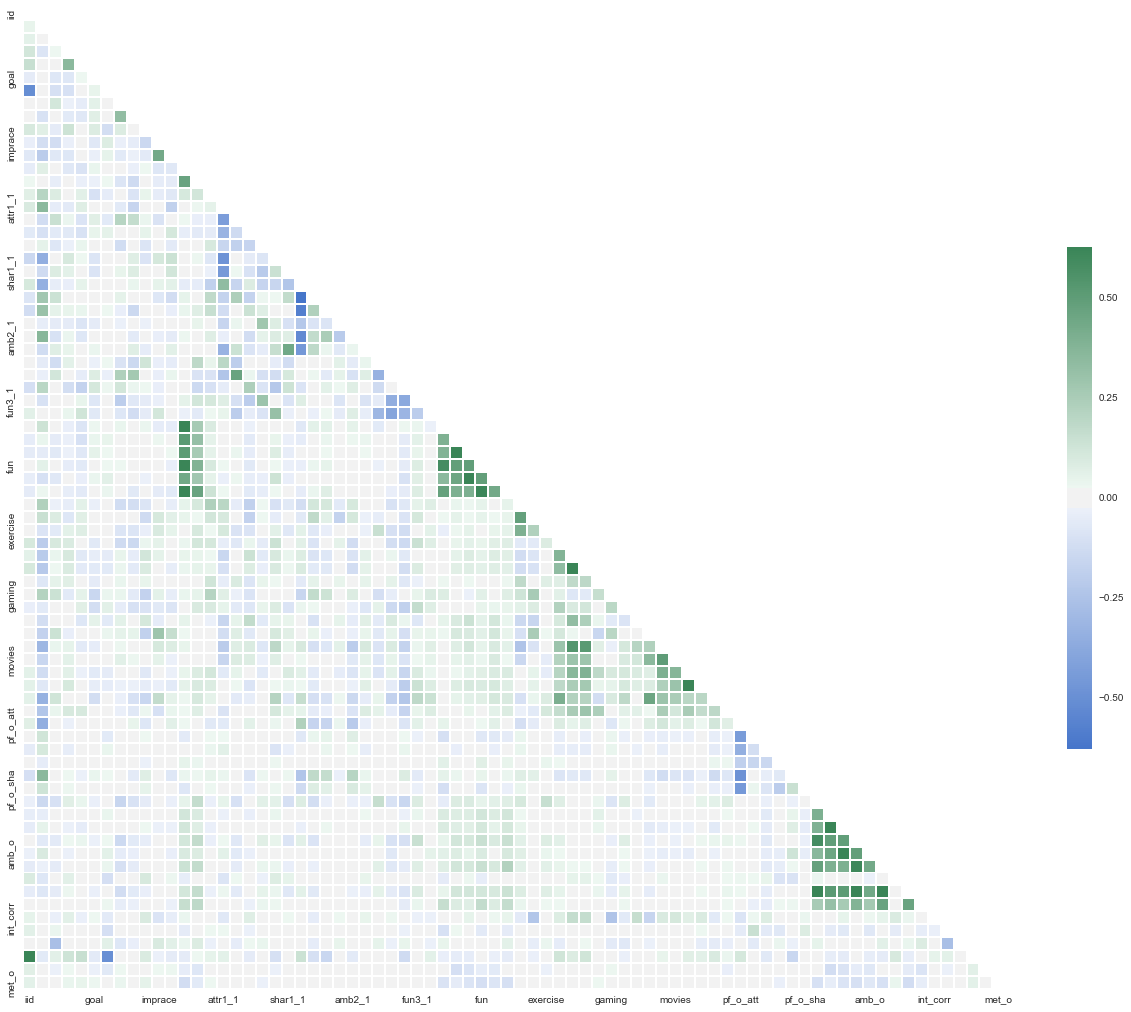

In [11]:
fc.make_corr(data[fc.feature_space])

<h2>Forest Feature Selection: ExtraTreesClassifier & RandomForestClassifier</h2>

In [12]:
#women_men = data[fc.all_space].copy()

In [13]:
#women_men.dropna(axis = 0, how = 'any', inplace = True)

<h4>Both Genders</h4>

In [14]:
#target_df = women_men['dec'].copy()
#input_df = women_men[fc.feature_space].copy()

In [15]:
#fc.forests(input_df, target_df)

<h4>Frequency Charts for Females</h4>

In [16]:
#fc.dating_attributes_vs_time_hist(data = data, gender = 0)

<h4>Frequency Charts for Males</h4>

In [17]:
#fc.dating_attributes_vs_time_hist(data = data, gender = 1)

<h2>Create Matched People DataFrame</h2>

In [18]:
#people_matched = data[data['match'] == 1].copy()
#people_matched.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)
#display(people_matched)

<h2>Exploring Matches</h2>

In [19]:
#people_matched[['iid', 'gender', 'dec'] + fc.features_of_attraction + fc.preferences_of_attraction + ['dec_o', 'pid', 'goal', 'int_corr', 'match']]

<h4>Get Index for 'iid' for non-matches</h4>

In [20]:
#number = [int(i) for i in people_matched['iid']]
#not_ever_matched = [i for i in range(1,553) if i not in number]
#print not_ever_matched

In [21]:
#people_not_matched = data[data['iid'].isin(not_ever_matched)].copy()

<h2>Exploring Non-Matches</h2>

In [22]:
#people_not_matched[['iid', 'gender', 'dec'] + fc.features_of_attraction + fc.preferences_of_attraction + ['dec_o', 'pid', 'goal', 'int_corr', 'match']]

<h4>Non-Matched Females: Graphs</h4>

In [23]:
#fc.dating_attributes_vs_time(data = people_not_matched, gender = 0)

<h4>Non-Matched Males: Graphs</h4>

In [24]:
#fc.dating_attributes_vs_time(data = people_not_matched, gender = 1)

<h2>Dating Attributes as a function of Time: Distributing 100pts</h2>

<h4>Female Attributes</h4>

In [25]:
#fc.dating_attributes_vs_time_describe(unique[(unique['wave'] >= 6) & (unique['wave']<= 11)], 0)

<h4>Male Attributes</h4>

In [26]:
#fc.dating_attributes_vs_time_describe(unique[(unique['wave'] >= 6) & (unique['wave']<= 11)], 1)

<h2>Dating Attributes as a function of Time: Likert Scale</h2>

<h4>Female Attributes</h4>

In [27]:
#fc.dating_attributes_vs_time_describe(data[(data['wave'] >= 15) & (data['wave']<= 20)], 0)

<h4>Male Attributes</h4>

In [28]:
#fc.dating_attributes_vs_time_describe(unique[(unique['wave'] >= 15) & (unique['wave']<= 20)], 1)

In [29]:
#for i, j in fc.data_cleaner.iteritems():
#    print i, j, '\n'
#for i, j in fc.master_list.items():
#    print i, j, '\n'
#print 'clean_up_1', '\n', fc.clean_up_1, '\n'
#print 'clean_up_2', '\n', fc.clean_up_2, '\n'
#print 'clean_up_3', '\n', fc.clean_up_3, '\n'
#print 'clean_up_4', '\n', fc.clean_up_4, '\n'
#print 'clean_up_5', '\n', fc.clean_up_5, '\n'
#print 'features_of_attraction', '\n', fc.features_of_attraction, '\n'
#print 'actual_decisions', '\n', fc.actual_decisions, '\n'
#print 'preferences_of_attraction', '\n', fc.preferences_of_attraction, '\n'
#print 'rating_by_partner_features', '\n', fc.rating_by_partner_features, '\n'
#print 'halfway_questions', '\n', fc.halfway_questions, '\n'
#print 'interests', '\n', fc.interests, '\n'
#print 'list_of_lists', '\n', fc.list_of_lists, '\n'
#print 'feature_space', '\n', fc.feature_space, '\n'
#print 'all_space', '\n', fc.all_space, '\n'
#print 'all columns in dataset', '\n'
#for i in data.keys():
#    print i,
to_drop = [i for i in data.keys() if i not in fc.all_space]
#print '\n'*2, 'to_drop', '\n', to_drop, '\n'

In [30]:
#display(data[fc.to_do_list[0]].head())
#fc.scale_question_3(data)
#display(data[fc.to_do_list[0]].head())